**If you like my notebook, please upvote my work!**

**If you use parts of this notebook in your scripts/notebooks, giving some kind of credit for instance link back to this notebook would be very much appreciated. Thanks in advance!** :) 

**P.S:**
1. The scripts in lines 22 and 25 show errors when run on kaggle but will run perfectly fine after downloading and running the script on local machine.

2. Please make sure that you have plotly installed on your local machine.

Lastly if anyone knows how to fix the above problem please let me know. Thankyou! :)
Hope you like my work!


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv


# Importing important libraries

In [2]:
import math
import seaborn as sns
import xgboost as xgb
import plotly.express as px
from xgboost import XGBRegressor
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split,GridSearchCV

# Loading the training dataset

In [3]:
#Reading the training file
df_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data Preprocessing:

## Checking and removal of null values

In [5]:
for i in df_train.columns:
    print( i+" \t: " +str(df_train[i].isnull().sum()))

Id 	: 0
MSSubClass 	: 0
MSZoning 	: 0
LotFrontage 	: 259
LotArea 	: 0
Street 	: 0
Alley 	: 1369
LotShape 	: 0
LandContour 	: 0
Utilities 	: 0
LotConfig 	: 0
LandSlope 	: 0
Neighborhood 	: 0
Condition1 	: 0
Condition2 	: 0
BldgType 	: 0
HouseStyle 	: 0
OverallQual 	: 0
OverallCond 	: 0
YearBuilt 	: 0
YearRemodAdd 	: 0
RoofStyle 	: 0
RoofMatl 	: 0
Exterior1st 	: 0
Exterior2nd 	: 0
MasVnrType 	: 8
MasVnrArea 	: 8
ExterQual 	: 0
ExterCond 	: 0
Foundation 	: 0
BsmtQual 	: 37
BsmtCond 	: 37
BsmtExposure 	: 38
BsmtFinType1 	: 37
BsmtFinSF1 	: 0
BsmtFinType2 	: 38
BsmtFinSF2 	: 0
BsmtUnfSF 	: 0
TotalBsmtSF 	: 0
Heating 	: 0
HeatingQC 	: 0
CentralAir 	: 0
Electrical 	: 1
1stFlrSF 	: 0
2ndFlrSF 	: 0
LowQualFinSF 	: 0
GrLivArea 	: 0
BsmtFullBath 	: 0
BsmtHalfBath 	: 0
FullBath 	: 0
HalfBath 	: 0
BedroomAbvGr 	: 0
KitchenAbvGr 	: 0
KitchenQual 	: 0
TotRmsAbvGrd 	: 0
Functional 	: 0
Fireplaces 	: 0
FireplaceQu 	: 690
GarageType 	: 81
GarageYrBlt 	: 81
GarageFinish 	: 81
GarageCars 	: 0
GarageArea 	

As we can see there are a lot of null values so we need to replace these null values.

### Defining what to replace with.

In [6]:
max_replacements = ['MSZoning','Utilities','Exterior1st','Exterior2nd','KitchenQual',
                    'Functional','Electrical','SaleType']

zero_replacements = ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
                     'BsmtFullBath','BsmtHalfBath','GarageCars','GarageArea',
                     'MasVnrArea']

median_replacements=['LotFrontage']

na_replacements = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
                   'BsmtFinType2','FireplaceQu','GarageType','GarageFinish',
                   'GarageQual','GarageCond','PoolQC','Fence','MiscFeature',
                   'MasVnrType']

mean_replacements = ['GarageYrBlt']

Max: It is for all the categorical data where we are replacing the null with most common occuring data in that column.

Zero: We are replacing by zero because the value of all fields related to basement and garage have similar null counts which indicates that it is plausibe that in these houses there is no basement/garage so we should replace it by zero.

Median: It is for all the rest of the fields where the data is numeric and has some sort of order to it but also is either categorical or has some outliers.(Although we could have used mean here, the mean is affected by alot by outliers (For decinding this, the box plots have been drawn later.))

NA: It is for those data fields where NA is a separate category as mentioned in the data_description file and hence we have to consider it as an individual field.

Mean: It is for numeric fields that do not have many outliers. 

P.S: We have only defined replacements for the fields with missing values in either test or train sets.

### Applying the replacements. 

In [7]:
for i in max_replacements:
    value = df_train[i].value_counts().idxmax()
    df_train[i] = df_train[i].fillna(value)
    
for i in median_replacements:
    value = df_train[i].median()
    df_train[i] = df_train[i].fillna(value)
    
for i in na_replacements:
    value = 'NA'
    df_train[i] = df_train[i].fillna(value)
    
for i in mean_replacements:
    value = df_train[i].mean()
    df_train[i] = df_train[i].fillna(value)

for i in zero_replacements:
    value = 0
    df_train[i] = df_train[i].fillna(value)

### Verifying if all null values are removed. 

In [8]:
print('Total no. of null values now are : '+ str(df_train[i].isnull().sum().sum()))

Total no. of null values now are : 0


## Separating categorical and continuous data fields

In [9]:
list_cat = ['MSSubClass','MSZoning','Street','Alley', 'LotShape', 'LandContour',
            'Utilities', 'LotConfig','LandSlope', 'Neighborhood','Condition1', 
            'Condition2','BldgType','HouseStyle', 'OverallQual','OverallCond',
            'RoofStyle', 'RoofMatl', 'Exterior1st','Exterior2nd', 'MasVnrType',
            'ExterQual','ExterCond', 'Foundation', 'BsmtQual','BsmtCond',
            'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC', 
            'CentralAir', 'Electrical','BsmtFullBath','BsmtHalfBath','FullBath',
            'HalfBath','BedroomAbvGr', 'KitchenAbvGr','KitchenQual',
            'TotRmsAbvGrd','Functional','Fireplaces','FireplaceQu','GarageType',
            'GarageFinish','GarageCars','GarageQual','GarageCond', 'PavedDrive',
            'PoolQC','Fence','MiscFeature','SaleType','SaleCondition']

list_cont = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd','MasVnrArea',
             'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
             '2ndFlrSF', 'LowQualFinSF', 'GrLivArea','GarageYrBlt','GarageArea',
             'WoodDeckSF', 'OpenPorchSF','EnclosedPorch', '3SsnPorch', 
             'ScreenPorch', 'PoolArea','MiscVal', 'MoSold', 'YrSold',]

print('No. of columns with categorical data values are : '+str(len(list_cat)))

print('No. of columns with continuous data values are : '+str(len(list_cont)))

No. of columns with categorical data values are : 55
No. of columns with continuous data values are : 24


List_cate: It is the list of all the categorical data fields in the dataset.

List_cont: It is the list of all the continuous data fields in the dataset.(except SalePrice)

In [10]:
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NA,IR1,Lvl,AllPub,...,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,8,2007,WD,Normal,307000
7,8,60,RL,69.0,10382,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,1,2008,WD,Normal,118000


# Data Visualisation and removing of outliers: 

## Sale Price

### Box Plot of the sale price over the whole dataset.

In [11]:
column = 'Id'
name = 'ID'
a= []
for i in df_train.index:
    a.append(name +' : '+ str(df_train[column][i]))
df_train[column+'_visual'] = a

In this we have added an extra visual column for the box plot.

In [12]:
fig = px.box(data_frame = df_train.reset_index(),hover_name = 'Id_visual',
             y = 'SalePrice',hover_data = ['MoSold', 'YrSold'],height = 500,
             width = 400,labels = {'SalePrice':'Sale Price in "$"'},
             title = 'Box plot of the sale price(Hover for details)')
fig.show()

As we can see from the box plot there are a lot of outliers so we set a threshold for the price. Here I have taken it to be $450000

### Removing of outliers in Sale Price

In [13]:
removed = 0
threshold = 450000
for i in df_train.index:
    if df_train['SalePrice'][i]>threshold:
        df_train = df_train.drop(i)
        removed+=1
print('Total data points removed till now are: '+str(removed))

Total data points removed till now are: 14


Since we  do not want to remove too many data ponts, we will keep a track of how many data points have been removed up till any step.

## Categorical data fields:

### Bar Plot of all categorical data fields

In [14]:
display_order = {}
for i in list_cat :
    a = []
    for j in df_train.groupby(i).mean().index:
        a.append(j)
    display_order[i] = a
display_order['Alley'] = ['Grvl','Pave','NA']
display_order['LandContour'] = ['Lvl','Bnk', 'HLS', 'Low']
display_order['LotConfig'] = ['Inside','Corner', 'CulDSac', 'FR2', 'FR3']
display_order['ExterQual'] = ['Ex', 'Gd', 'TA', 'Fa']
display_order['ExterCond'] = ['Ex','Gd', 'TA','Fa','Po']
display_order['BsmtQual'] = ['Ex', 'Gd', 'TA', 'Fa','NA']
display_order['BsmtCond'] = ['Gd', 'TA', 'Fa','Po','NA']
display_order['BsmtExposure'] = ['Gd','Av', 'Mn', 'No','NA']
display_order['BsmtFinType1'] = ['GLQ','ALQ', 'BLQ','Rec', 'LwQ', 'Unf','NA']
display_order['BsmtFinType2'] = ['GLQ','ALQ', 'BLQ','Rec', 'LwQ', 'Unf','NA']
display_order['HeatingQC'] = ['Ex','Gd', 'TA','Fa','Po']
display_order['Electrical'] = ['SBrkr','FuseA', 'FuseF', 'FuseP', 'Mix']
display_order['KitchenQual'] = ['Ex','Gd', 'TA','Fa']
display_order['Functional']=['Typ','Min1', 'Min2','Mod','Maj1', 'Maj2','Sev']
display_order['FireplaceQu'] = ['Ex','Gd', 'TA','Fa','Po','NA']
display_order['GarageQual'] =['Ex','Gd', 'TA','Fa','Po','NA']
display_order['GarageCond'] =['Ex','Gd', 'TA','Fa','Po','NA']
display_order['GarageFinish'] = ['Fin','RFn','Unf','NA']
display_order['PoolQC'] = ['Ex','Gd','Fa','NA']
display_order['Fence'] = ['GdPrv','MnPrv','GdWo', 'MnWw','NA']
display_order['SaleType'] = ['WD','CWD','New','COD','Con','ConLw','ConLI','ConLD','Oth']
display_order['SaleCondition'] = ['Normal','Abnorml','AdjLand','Alloca','Family',
                                  'Partial']

Since non-numerical categorical data in a dataset will be displayed in an alphabetical order in the graphs, we need to provide a dictionary with orders in order to override the default order.

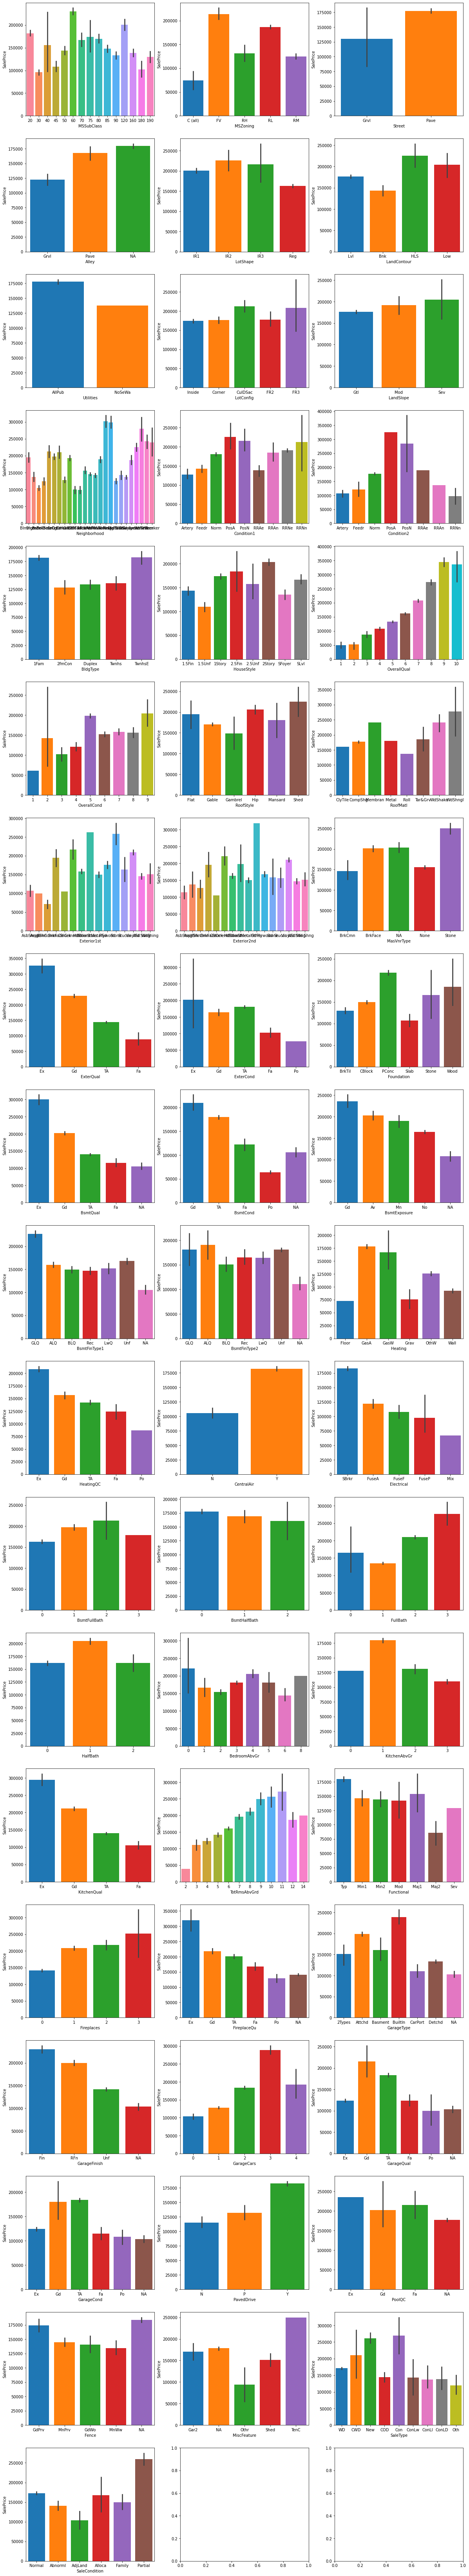

In [15]:
y = 'SalePrice'
n = 3
s= 20
f,axes = plt.subplots(19,n,figsize = (s,6*s))
counter = 0
for i in list_cat:
    sns.barplot(x = i , y = y , data  = df_train,order= display_order[i],
                ax = axes[counter//n][counter%n],saturation = 1)
    counter+=1

In order to view the detailed plot of any just replace x with the column of choice in the line 2 of box below.

In [16]:
z = 1.960 #using confidence level of 95% (for 99% use 3.291)
x = 'Neighborhood'
df_temp = df_train.groupby(x).mean()
confidences = []
sale_visual = []
count = []
for i in df_temp.index:
    a = []
    counter = 0
    for j in df_train.index:
        if df_train[x][j] == i:
            a.append(df_train['SalePrice'][j]-df_temp['SalePrice'][i])
            counter+=1
    count.append(counter)
    std = np.std(a)
    confidence = std/(math.sqrt(counter))
    confidences.append((z*confidence)//1)
    sale_visual.append('Sale Price : ' + str(df_temp['SalePrice'][i]//1))
df_temp ['Confidence'] = confidences
df_temp ['sale_visual'] = sale_visual
df_temp ['Total Count'] = count
count_per = []
for i in df_temp.index:
    per = df_temp['Total Count'][i]/np.sum(count)
    per = (per*10000)//1
    per= per//100
    count_per.append(str(per)+'%')
df_temp['Count Percentage'] = count_per

fig = px.bar(data_frame = df_temp.reset_index(),y='SalePrice', color = x ,
             x = x,category_orders = display_order,error_y = 'Confidence',
             hover_name = sale_visual,opacity= 1,
             hover_data = ['Total Count','Count Percentage'],
             labels = {y : 'Sale Price in "$"', 'Grvl':'Gravel','Pave':'Paved',
                       'NA':'Not Paved'})
fig.show()

In [17]:
#List of features on which to apply one hot encoding before applying regression:
list_pure_categorical = ['MSSubClass','MSZoning','LotShape','LandContour', 'LotConfig',
                         'Neighborhood','Condition1', 'Condition2', 'BldgType',
                         'HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
                         'Foundation','Heating','GarageType','SaleType',
                         'SaleCondition','MiscFeature','MasVnrType']

#List of categorical features that we can directly apply regression on:
categorical_ordered = ['Street','Alley','Utilities','LandSlope','OverallQual',
                       'OverallCond','ExterQual', 'ExterCond','BsmtQual','BsmtCond',
                       'BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC',
                       'CentralAir','Electrical','KitchenQual','BsmtFullBath', 
                       'BsmtHalfBath', 'FullBath','HalfBath','BedroomAbvGr', 
                       'KitchenAbvGr','TotRmsAbvGrd','Functional','Fireplaces',
                       'FireplaceQu','GarageFinish', 'GarageCars','GarageQual',
                       'GarageCond', 'PavedDrive','PoolQC','Fence']

#List of continuous variables:
list_continuous = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd','MasVnrArea',
                   'BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GarageYrBlt', 
                   'GarageArea','WoodDeckSF', 'OpenPorchSF','EnclosedPorch', 
                   '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal','MoSold', 'YrSold',
                   'LowQualFinSF', 'GrLivArea','2ndFlrSF']

list_pure_categorical: This is the list of data fields which do not have any linear pattern and thus we cannot apply regression on these varibles directly in any manner and therefore these variables will go under one hot encoding.

categorical_ordered: It is the list of categorical data fields which have some king of order to it and therefore we can directly apply regression on them by converting these into numbers and do not need to apply one hot encoding on these.

list_continuous: It is the list of continuous data fields in the dataset.(except SalePrice)

### Converting ordered categorical fields to numbers

In [18]:
for i in categorical_ordered:
    a = []
    for j in df_train.index:
        for k in range(len(display_order[i])):
            if df_train[i][j] ==display_order[i][k]:
                a.append(k+1)
    df_train[i] = a
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Id_visual
0,1,60,RL,65.0,8450,2,3,Reg,Lvl,1,...,4,5,NA,0,2,2008,WD,Normal,208500,ID : 1
1,2,20,RL,80.0,9600,2,3,Reg,Lvl,1,...,4,5,NA,0,5,2007,WD,Normal,181500,ID : 2
2,3,60,RL,68.0,11250,2,3,IR1,Lvl,1,...,4,5,NA,0,9,2008,WD,Normal,223500,ID : 3
3,4,70,RL,60.0,9550,2,3,IR1,Lvl,1,...,4,5,NA,0,2,2006,WD,Abnorml,140000,ID : 4
4,5,60,RL,84.0,14260,2,3,IR1,Lvl,1,...,4,5,NA,0,12,2008,WD,Normal,250000,ID : 5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,2,3,Reg,Lvl,1,...,4,5,NA,0,8,2007,WD,Normal,175000,ID : 1456
1456,1457,20,RL,85.0,13175,2,3,Reg,Lvl,1,...,4,2,NA,0,2,2010,WD,Normal,210000,ID : 1457
1457,1458,70,RL,66.0,9042,2,3,Reg,Lvl,1,...,4,1,Shed,2500,5,2010,WD,Normal,266500,ID : 1458
1458,1459,20,RL,68.0,9717,2,3,Reg,Lvl,1,...,4,5,NA,0,4,2010,WD,Normal,142125,ID : 1459


As we can see all the ordered categorical data fields in the data set have been converted into numbers. 

## Continuous data fields

### Box plot of all continuous data fields

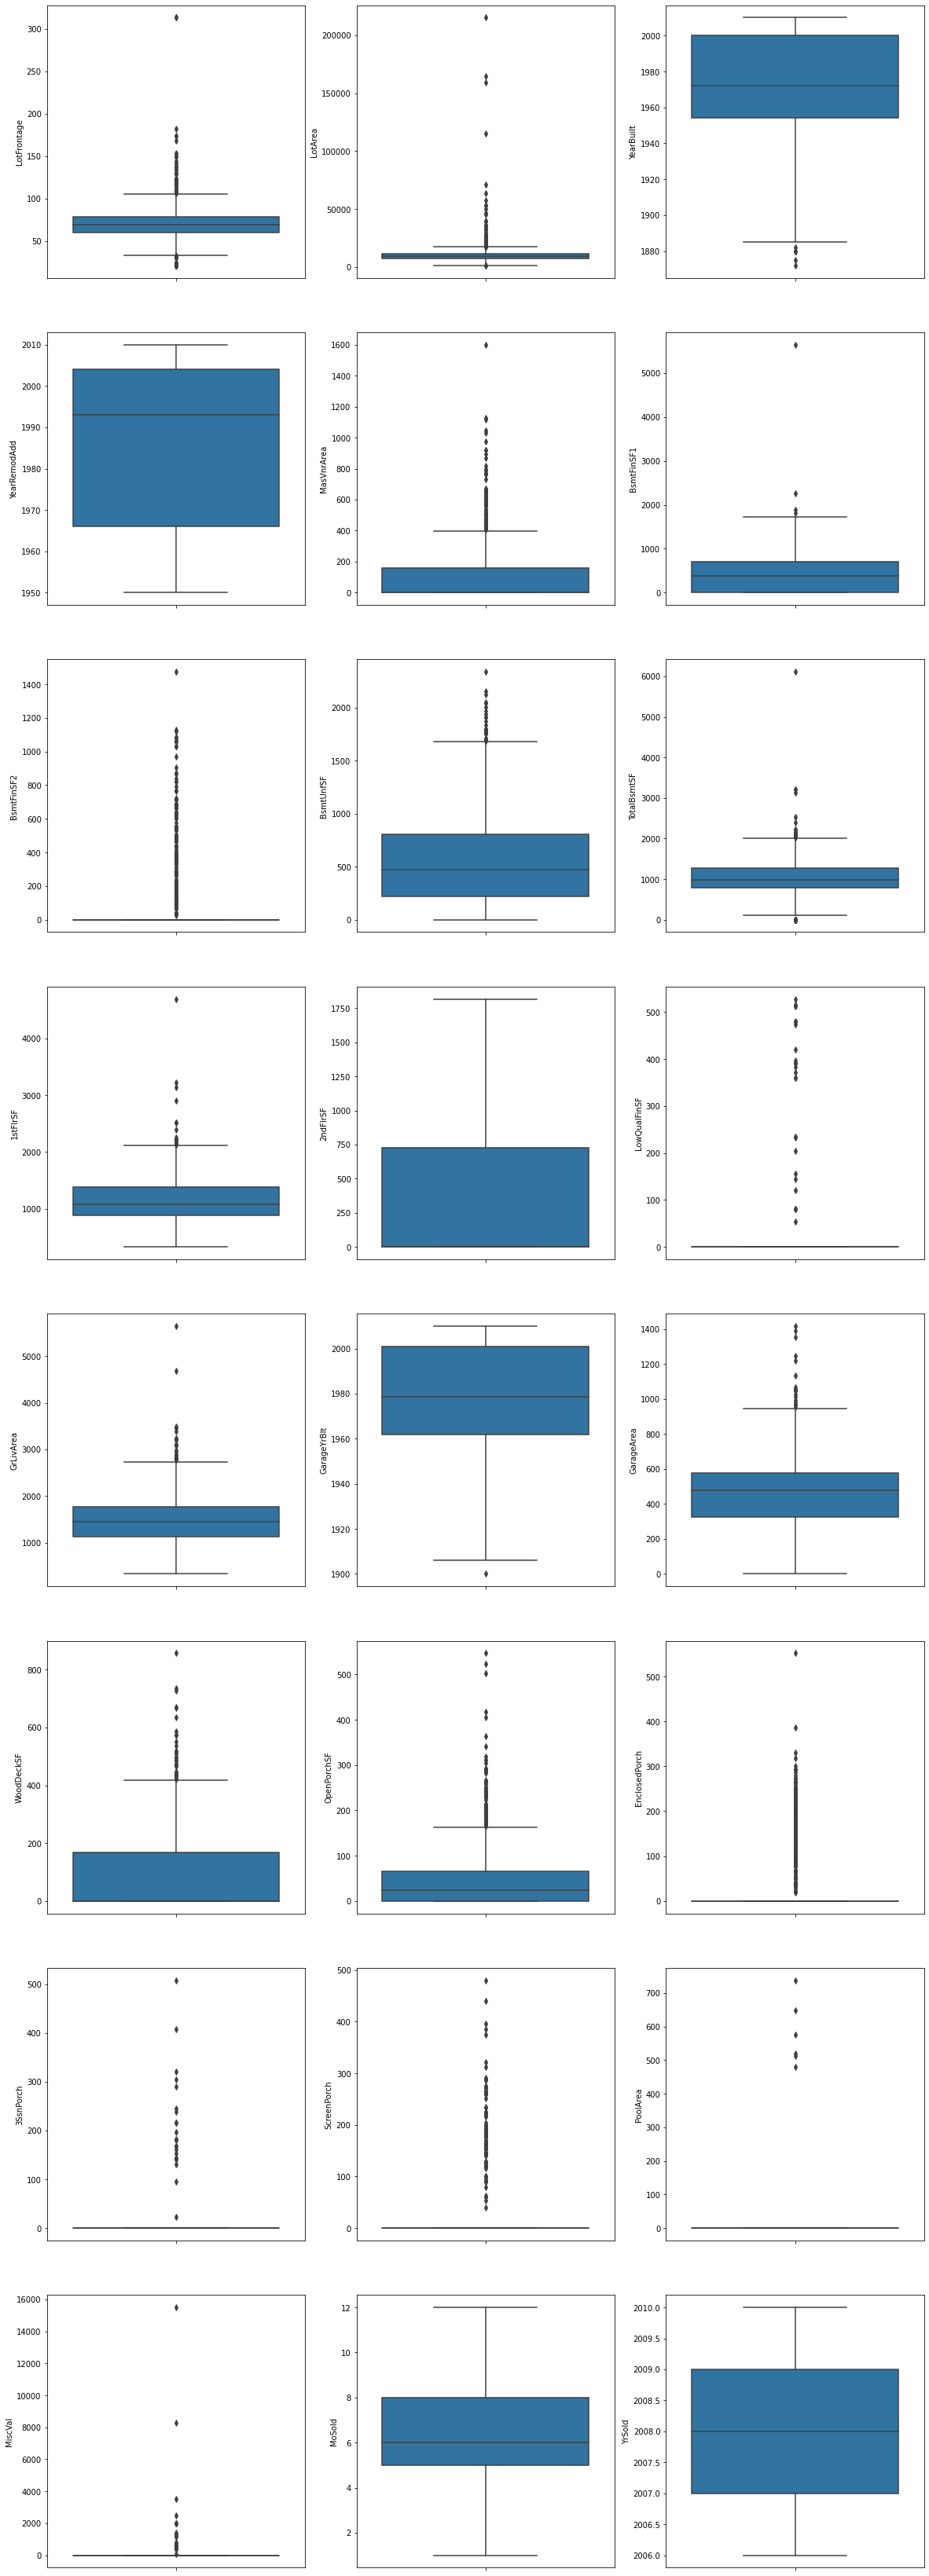

In [19]:
n = 3
s= 20
f,axes = plt.subplots(3*n-1,n,figsize = (s,3*s))
counter = 0
for i in list_cont:
    sns.boxplot( y = i,data  = df_train, ax = axes[counter//n][counter%n])
    counter+=1

### Removing outliers from continuous data fields

In [20]:
outlier ={'LotFrontage':150, 'LotArea':100000,'MasVnrArea':900,'BsmtFinSF1':2000,
          'TotalBsmtSF':2500,'1stFlrSF':2500, 'GarageArea':1130,'WoodDeckSF':600, 
          'OpenPorchSF':310,'EnclosedPorch':310,'3SsnPorch':350,'MiscVal':6000,
          'GrLivArea':3500, 'BsmtFullBath':2.5,'2ndFlrSF':1750}
for j in outlier:
    for i in df_train.index:
        if df_train[j][i]>outlier[j]:
            df_train = df_train.drop(i)
            removed+=1
    #print(j + ' : '+ str(removed))
for i in df_train.index:
    if df_train['YearBuilt'][i]<1880:
        df_train = df_train.drop(i)
        removed+=1
#print('YearBuilt' + ' : '+ str(removed))
print('Total data points removed till now are: '+str(removed))

Total data points removed till now are: 80


## Line Plots for all continuous data fields 

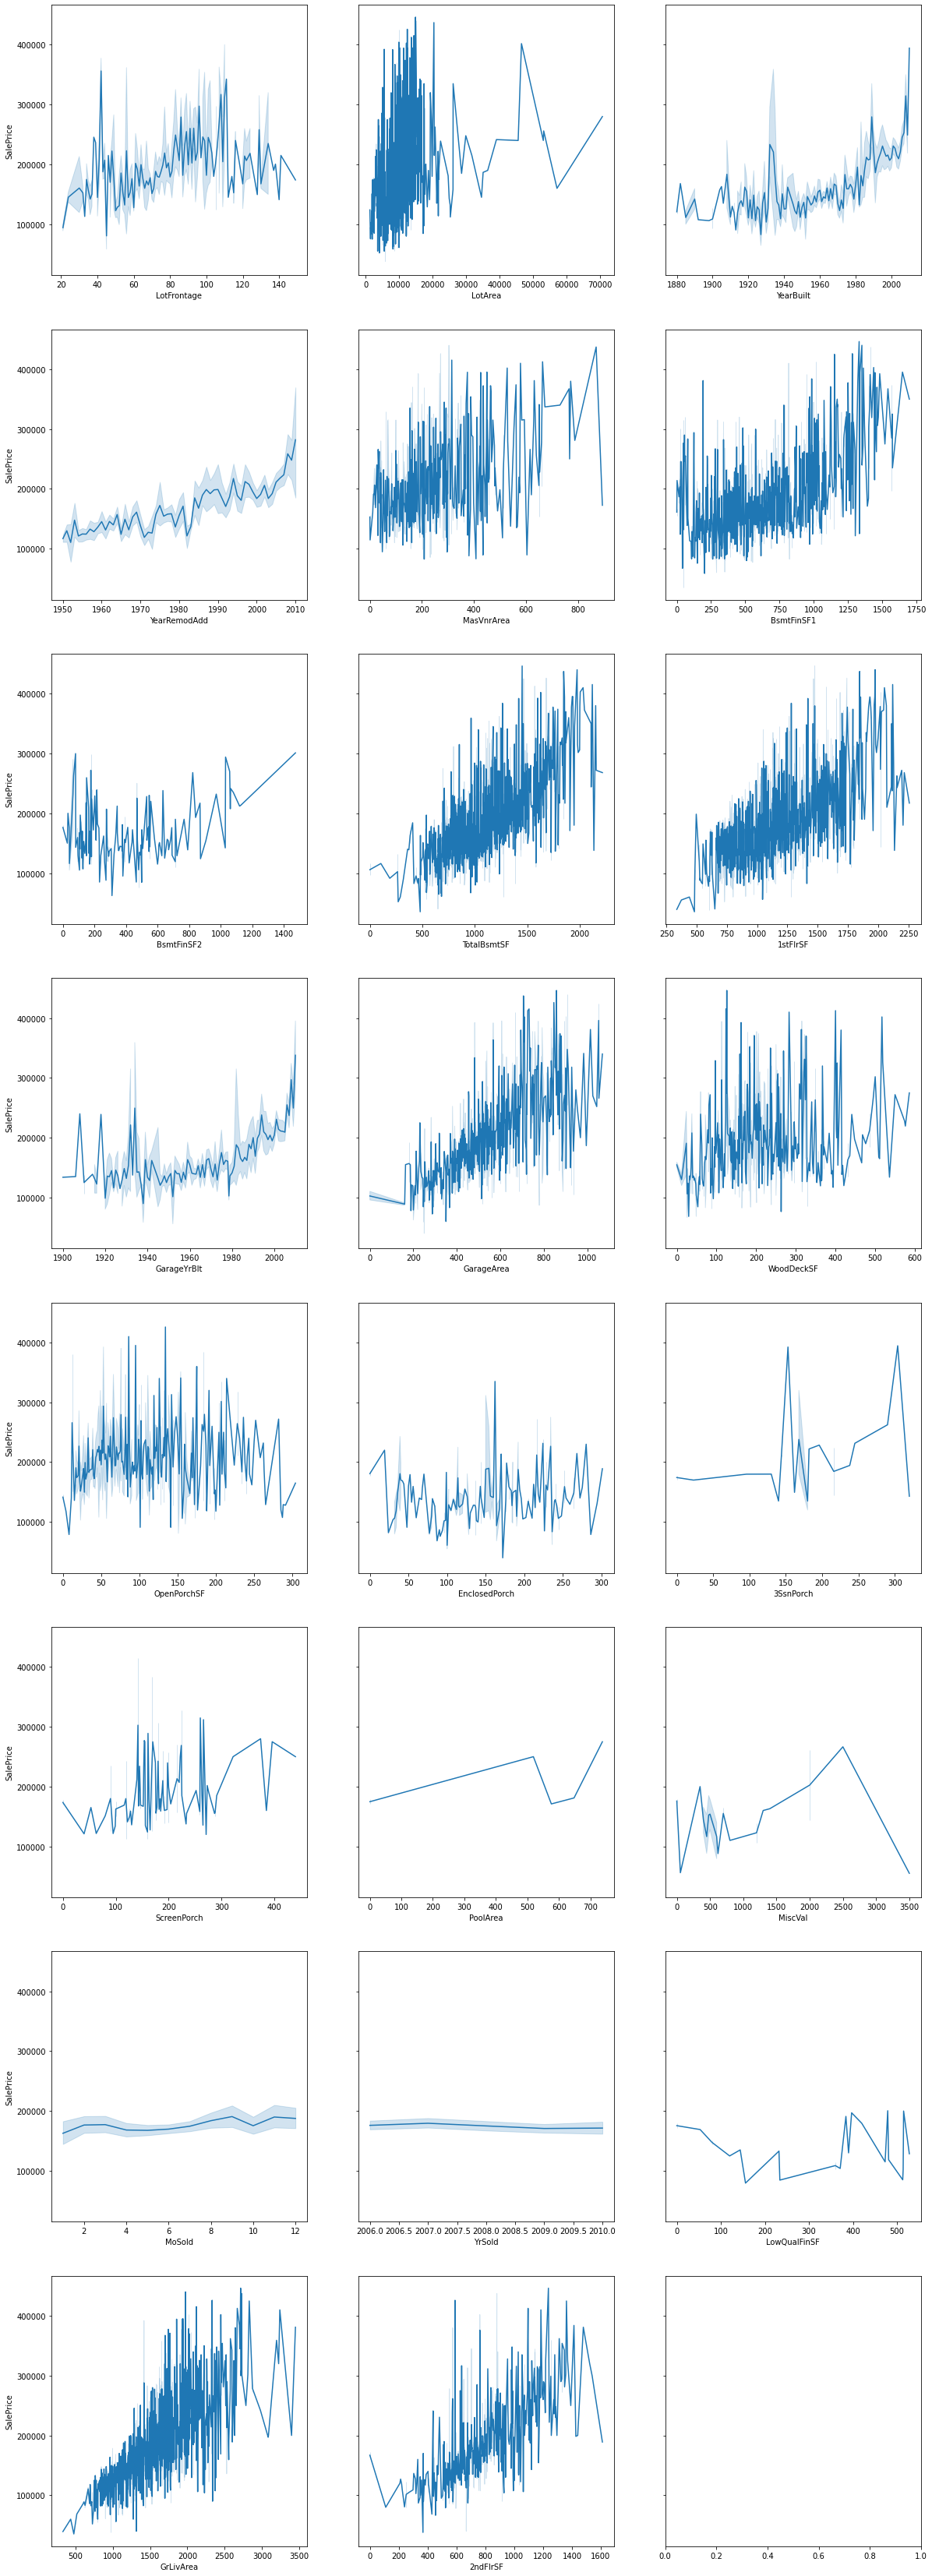

In [21]:
y = 'SalePrice'
n = 3
s= 20
f,axes = plt.subplots(8,n,figsize = (s,3*s),sharey=True)
counter = 0
for i in list_continuous:
    sns.lineplot(x = i , y = y , data  = df_train, ax = axes[counter//n][counter%n])
    counter+=1

## Plotting a correlation matrix for all ordered categorical and continuous data fields vs Sale Price.

In [22]:
corr  = df_train[categorical_ordered+list_continuous + ['SalePrice']].corr()
label = {'x':"Column", 'y': 'Row', 'color':'Correlation'}
columns =categorical_ordered+list_continuous + ['SalePrice']
fig = px.imshow(img = corr, x = columns,y = columns,labels = label,
                color_continuous_scale = [[0,'white'],[0.33,'yellow'],
                                          [0.66,'red'],[1.0,'black']],
                height = 1100,width = 1100,color_continuous_midpoint = 0,
                title = 'Correlation matrix for continuous and ordered categorical data fields.')
fig.show()

TypeError: imshow() got an unexpected keyword argument 'x'

Here in order to make the machine learning model, I have taken the threshold to be 0.15. Thus we will take any columns that have a correlation of greater than 0.15 and discard the rest.

In [23]:
columns = categorical_ordered+list_continuous + ['SalePrice']
useful = []
for i in columns:
    if (corr[i]['SalePrice'])>=.15 or (corr[i]['SalePrice'])<=-.15:
        useful.append(i)

## Plotting a correlational matrix for all purely categorical fields.

### One hot encoding of all purely categorical data columns

In [24]:
useful_category = []
for j in list_pure_categorical:
    for i in df_train.groupby(j).count().index:
        s = j+str(i)
        a=[]
        for k in df_train.index:
            if df_train[j][k]==i:
                a.append(1)
            else:
                a.append(0)
        df_train[s]=a
        useful_category.append(s)
len (useful_category)

171

### Plotting the correlational matrix.

In [25]:
corr  = df_train[useful_category + ['SalePrice']].corr()
label = {'x':"Column", 'y': 'Row', 'color':'Correlation'}
columns =useful_category + ['SalePrice']
fig = px.imshow(img = corr, x = columns,y = columns,labels = label,
                color_continuous_scale = [[0,'white'],[0.42,'yellow'],
                                          [0.58,'red'],[1.0,'black']],
                height = 1100,width = 1100,color_continuous_midpoint = 0,
                title = 'Correlation matrix for one hot encoded categorical data fields.')
fig.show()

TypeError: imshow() got an unexpected keyword argument 'x'

In [26]:
columns = useful_category + ['SalePrice']
final_useful = []
for i in columns:
    if (corr[i]['SalePrice'])>=.15 or (corr[i]['SalePrice'])<=-.15:
        final_useful.append(i)

Here in order to make the machine learning model, I have taken the threshold to be 0.15. Thus we will take any columns that have a correlation of greater than 0.15 and discard the rest.

In [27]:
useful = useful+final_useful
useful

['Alley',
 'OverallQual',
 'ExterQual',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'FireplaceQu',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'GrLivArea',
 '2ndFlrSF',
 'SalePrice',
 'MSSubClass30',
 'MSSubClass50',
 'MSSubClass60',
 'MSZoningRL',
 'MSZoningRM',
 'LotShapeIR1',
 'LotShapeReg',
 'NeighborhoodBrkSide',
 'NeighborhoodEdwards',
 'NeighborhoodIDOTRR',
 'NeighborhoodNAmes',
 'NeighborhoodNoRidge',
 'NeighborhoodNridgHt',
 'NeighborhoodOldTown',
 'NeighborhoodSomerst',
 'NeighborhoodStoneBr',
 'HouseStyle1.5Fin',
 'HouseStyle2Story',
 'RoofStyleGable',
 'RoofStyleHip',
 '

# Prepaing training and testing sets

## 1. Training set

In [28]:
df_train_x = df_train[useful].drop(['SalePrice'],axis = 1)
df_train_x.describe()

,Alley,OverallQual,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,HeatingQC,CentralAir,Electrical,...,GarageTypeAttchd,GarageTypeBuiltIn,GarageTypeDetchd,GarageTypeNA,SaleTypeNew,SaleTypeWD,SaleConditionPartial,MasVnrTypeBrkFace,MasVnrTypeNone,MasVnrTypeStone
count,1380.000000,1380.000000,1380.000000,1380.00000,1380.000000,1380.000000,1380.000000,1380.000000,1380.000000,1380.000000,...,1380.000000,1380.000000,1380.00000,1380.000000,1380.000000,1380.000000,1380.000000,1380.000000,1380.000000,1380.000000
mean,2.903623,6.036232,2.625362,2.50942,2.070290,3.412319,3.498551,1.861594,1.935507,1.115217,...,0.597826,0.055797,0.27029,0.053623,0.078261,0.876087,0.079710,0.308696,0.592754,0.084058
std,0.395938,1.319840,0.551425,0.77902,0.563696,1.033307,2.103383,0.959878,0.245718,0.403646,...,0.490514,0.229613,0.44427,0.225354,0.268679,0.329602,0.270942,0.462123,0.491500,0.277575
min,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,5.000000,2.000000,2.00000,2.000000,3.000000,1.000000,1.000000,2.000000,1.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,6.000000,3.000000,3.00000,2.000000,4.000000,3.000000,1.000000,2.000000,1.000000,...,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,7.000000,3.000000,3.00000,2.000000,4.000000,6.000000,3.000000,2.000000,1.000000,...,1.000000,0.000000,1.00000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,3.000000,10.000000,4.000000,5.00000,5.000000,5.000000,7.000000,5.000000,2.000000,5.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 2. Testing set

In [29]:
df_train_y = df_train[['SalePrice']]
df_train_y.describe()

,SalePrice
count,1380.000000
mean,174859.127536
std,67691.337651
min,35311.000000
25%,129000.000000
50%,160000.000000
75%,207500.000000
max,446261.000000


# Machine Learning model

## Splitting data into train test sets

In [30]:
x_train,x_test,y_train,y_test = train_test_split(df_train_x, df_train_y,test_size=0.10,
                                                 random_state=42)

## Using polynomial on the dataset

In [31]:
poly = PolynomialFeatures(degree=2)
poly_x_train = poly.fit_transform(x_train)
poly_x_test = poly.fit_transform(x_test)

In [32]:
xg = xgb.XGBRegressor(criterion = 'mse')
parameters = {"max_depth": [1,2,3,4,5,6],
              "learning rate": [0.01,0.03,0.05],
              "alpha":[0,2,4,6],
              'n_estimators': [60,80,100,120]}

## Trying different models to see which one works best for the given data. 

In [33]:
models = ['Normal Linear Regression: ','Linear Regression over polynomial: ',
          'Normal XGBoost: ','XGBoost over polynomial: ']
predict = []
reg = LinearRegression().fit(x_train, y_train)
pre_reg = reg.predict(x_test)

reg_poly = LinearRegression().fit(poly_x_train, y_train)
pre_reg_poly = reg_poly.predict(poly_x_test)

xgb_reg = GridSearchCV(xg, parameters, cv=5, verbose=2)
xgb_reg.fit(x_train, y_train)
pre_xgb_reg = xgb_reg.predict(x_test)

predict.append(pre_reg)
predict.append(pre_reg_poly)
predict.append(pre_xgb_reg)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] alpha=0, learning rate=0.01, max_depth=1, n_estimators=60 .......
[CV]  alpha=0, learning rate=0.01, max_depth=1, n_estimators=60, total=   0.2s
[CV] alpha=0, learning rate=0.01, max_depth=1, n_estimators=60 .......


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  alpha=0, learning rate=0.01, max_depth=1, n_estimators=60, total=   0.0s
[CV] alpha=0, learning rate=0.01, max_depth=1, n_estimators=60 .......
[CV]  alpha=0, learning rate=0.01, max_depth=1, n_estimators=60, total=   0.0s
[CV] alpha=0, learning rate=0.01, max_depth=1, n_estimators=60 .......
[CV]  alpha=0, learning rate=0.01, max_depth=1, n_estimators=60, total=   0.0s
[CV] alpha=0, learning rate=0.01, max_depth=1, n_estimators=60 .......
[CV]  alpha=0, learning rate=0.01, max_depth=1, n_estimators=60, total=   0.0s
[CV] alpha=0, learning rate=0.01, max_depth=1, n_estimators=80 .......
[CV]  alpha=0, learning rate=0.01, max_depth=1, n_estimators=80, total=   0.1s
[CV] alpha=0, learning rate=0.01, max_depth=1, n_estimators=80 .......
[CV]  alpha=0, learning rate=0.01, max_depth=1, n_estimators=80, total=   0.1s
[CV] alpha=0, learning rate=0.01, max_depth=1, n_estimators=80 .......
[CV]  alpha=0, learning rate=0.01, max_depth=1, n_estimators=80, total=   0.1s
[CV] alpha=0, learnin

[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:  3.4min finished


In [34]:
for prediction in range(len(predict)):
    pre = []
    for p in predict[prediction]:
        if p < 0:
            pre.append(0)
        else:
            pre.append(p)
    print(models[prediction]+str(np.sqrt(mean_squared_log_error( y_test, pre ))))

Normal Linear Regression: 0.162993161754019
Linear Regression over polynomial: 4.25875710975974
Normal XGBoost: 0.155205982107924


In [35]:
print(xgb_reg.best_params_)

{'alpha': 6, 'learning rate': 0.01, 'max_depth': 2, 'n_estimators': 100}


As we can see that the XGBoost model works best in this therefore we use the XGBoost model.

## Retraining the model over the whole dataset. 

In [36]:
xg = xgb.XGBRegressor(criterion = 'mse',alpha  = 6,eta = 0.01,max_depth = 2,n_estimators = 100)
xg_reg = xg.fit(df_train_x, df_train_y)

In [37]:
predicted_train = xg_reg.predict(df_train_x)
df_train['SalePricePredicted'] = predicted_train

## Plotting the residual plot for the model

In [38]:
df_train['Residuals'] = (df_train['SalePrice'] - df_train['SalePricePredicted'])//1
df_train['mod_Residuals'] = abs(df_train['Residuals'])

In [39]:
dic_residuals = {'SalePricePredicted':'Value predicted by the model',
                 'Residuals':'Residual value','mod_Residuals':'Divergence'}
fig = px.scatter(data_frame = df_train,x = 'SalePricePredicted',y = 'Residuals',
                 hover_name ='Id_visual',hover_data = ['SalePrice'],opacity = 1,
                 trendline = 'ols',trendline_color_override = 'darkred',
                 range_y = [-70000,270000],color= 'mod_Residuals',
                 marginal_y ='box',labels = dic_residuals,
                 title = 'Residual value plot when using Linear Regression')
fig.show()

Since the distribution of points is mainly randomly around the trendline, Therefore the Linear Regression machine learning model is appropriate on this data set.

# Predicting output over the testset.

## Reading test file

In [40]:
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


## Checking and removal for null values

### Checking for null values 

In [41]:
for i in df_test.columns:
    print( i+" \t: " +str(df_test[i].isnull().sum()))

Id 	: 0
MSSubClass 	: 0
MSZoning 	: 4
LotFrontage 	: 227
LotArea 	: 0
Street 	: 0
Alley 	: 1352
LotShape 	: 0
LandContour 	: 0
Utilities 	: 2
LotConfig 	: 0
LandSlope 	: 0
Neighborhood 	: 0
Condition1 	: 0
Condition2 	: 0
BldgType 	: 0
HouseStyle 	: 0
OverallQual 	: 0
OverallCond 	: 0
YearBuilt 	: 0
YearRemodAdd 	: 0
RoofStyle 	: 0
RoofMatl 	: 0
Exterior1st 	: 1
Exterior2nd 	: 1
MasVnrType 	: 16
MasVnrArea 	: 15
ExterQual 	: 0
ExterCond 	: 0
Foundation 	: 0
BsmtQual 	: 44
BsmtCond 	: 45
BsmtExposure 	: 44
BsmtFinType1 	: 42
BsmtFinSF1 	: 1
BsmtFinType2 	: 42
BsmtFinSF2 	: 1
BsmtUnfSF 	: 1
TotalBsmtSF 	: 1
Heating 	: 0
HeatingQC 	: 0
CentralAir 	: 0
Electrical 	: 0
1stFlrSF 	: 0
2ndFlrSF 	: 0
LowQualFinSF 	: 0
GrLivArea 	: 0
BsmtFullBath 	: 2
BsmtHalfBath 	: 2
FullBath 	: 0
HalfBath 	: 0
BedroomAbvGr 	: 0
KitchenAbvGr 	: 0
KitchenQual 	: 1
TotRmsAbvGrd 	: 0
Functional 	: 2
Fireplaces 	: 0
FireplaceQu 	: 730
GarageType 	: 76
GarageYrBlt 	: 78
GarageFinish 	: 78
GarageCars 	: 1
GarageArea

### Removal of null values 

In [42]:
for i in max_replacements:
    value = df_test[i].value_counts().idxmax()
    df_test[i] = df_test[i].fillna(value)
    
for i in median_replacements:
    value = df_test[i].median()
    df_test[i] = df_test[i].fillna(value)
    
for i in na_replacements:
    value = 'NA'
    df_test[i] = df_test[i].fillna(value)
    
for i in mean_replacements:
    value = df_test[i].mean()
    df_test[i] = df_test[i].fillna(value)
    
for i in zero_replacements:
    value = 0
    df_test[i] = df_test[i].fillna(value)

In [43]:
print('Total no. of null values now are : '+ str(df_test[i].isnull().sum().sum()))

Total no. of null values now are : 0


## Processing of test set

### One hot encoding of all purely categorical columns 

In [44]:
useful_category = []
for j in list_pure_categorical:
    for i in df_train.groupby(j).count().index:
        s = j+str(i)
        a=[]
        for k in df_test.index:
            if df_test[j][k]==i:
                a.append(1)
            else:
                a.append(0)
        df_test[s]=a
        useful_category.append(s)
len (useful_category)

171

### Converting ordered categorical fields to numbers

In [45]:
encode_list = ['Street','Alley','Utilities','LandSlope','ExterQual','ExterCond',
               'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
               'HeatingQC','CentralAir','Electrical','KitchenQual','Functional',
               'FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive',
               'PoolQC','Fence']

In [46]:
for i in encode_list:
    a = []
    for j in df_test.index:
        for k in range(len(display_order[i])):
            if df_test[i][j] == display_order[i][k]:
                a.append(k+1)
    df_test[i] = a

## Predicting over test set

In [47]:
useful1 = []
for i in useful:
    if i != 'SalePrice':
        useful1.append(i)

In [48]:
pre = xg_reg.predict(df_test[useful1])
df_test ['SalePrice'] = pre

In [49]:
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,Utilities,LandSlope,OverallQual,OverallCond,...,MiscFeatureNA,MiscFeatureOthr,MiscFeatureShed,MiscFeatureTenC,MasVnrTypeBrkCmn,MasVnrTypeBrkFace,MasVnrTypeNA,MasVnrTypeNone,MasVnrTypeStone,SalePrice
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.0,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.0,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.334476,9819.161069,1.995888,2.878684,1.0,1.045236,6.078821,5.553804,...,0.965045,0.001371,0.031528,0.0,0.006854,0.297464,0.010966,0.601782,0.082934,109677.281250
std,421.321334,42.746880,20.569211,4955.517327,0.064018,0.450215,0.0,0.217566,1.436812,1.113740,...,0.183730,0.037012,0.174801,0.0,0.082533,0.457299,0.104181,0.489699,0.275876,33099.621094
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,74756.234375
25%,1825.500000,20.000000,60.000000,7391.000000,2.000000,3.000000,1.0,1.000000,5.000000,5.000000,...,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,82810.554688
50%,2190.000000,50.000000,67.000000,9399.000000,2.000000,3.000000,1.0,1.000000,6.000000,5.000000,...,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,97658.609375
75%,2554.500000,70.000000,78.000000,11517.500000,2.000000,3.000000,1.0,1.000000,7.000000,6.000000,...,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,129815.937500
max,2919.000000,190.000000,200.000000,56600.000000,2.000000,3.000000,1.0,3.000000,10.000000,9.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,196287.671875


## Exporting output to csv

In [50]:
df_test[['Id','SalePrice']].to_csv('submission.csv',index=False)